##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile
!pip install plotly
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

##Dataset Collection
###ECG500 Dataset

In [ ]:
!wget https://www.timeseriesclassification.com/aeon-toolkit/ECG5000.zip

--2024-07-30 15:21:20--  https://www.timeseriesclassification.com/aeon-toolkit/ECG5000.zip
Resolving www.timeseriesclassification.com (www.timeseriesclassification.com)... 212.78.75.243
Connecting to www.timeseriesclassification.com (www.timeseriesclassification.com)|212.78.75.243|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 10614407 (10M) [application/zip]
Saving to: ‘ECG5000.zip.1’

ECG5000.zip.1       100%[===================>]  10.12M  2.53MB/s    in 4.3s    

2024-07-30 15:21:24 (2.38 MB/s) - ‘ECG5000.zip.1’ saved [10614407/10614407]



##Data Transformation

In [ ]:
with ZipFile('ECG5000.zip', 'r') as zip :
   zip.extractall(path='/content/dataset')

In [ ]:
df1 = pd.read_csv('/content/dataset/ECG5000_TRAIN.txt', sep='\s+', header=None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1.0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1.0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1.0,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1.0,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1.0,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456


In [ ]:
df1.shape

(500, 141)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 550.9 KB


In [ ]:
df2 = pd.read_csv('/content/dataset/ECG5000_TEST.txt', sep='\s+', header=None)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1.0,3.690844,0.711414,-2.114091,-4.141007,-4.574472,-3.431909,-1.950791,-1.107067,-0.632322,...,-0.032477,0.022847,0.188937,0.480932,0.629250,0.577291,0.665527,1.035997,1.492287,-1.905073
1,1.0,-1.348132,-3.996038,-4.226750,-4.251187,-3.477953,-2.228422,-1.808488,-1.534242,-0.779861,...,0.937984,1.570938,1.591394,1.549193,1.193077,0.515134,0.126274,0.267532,1.071148,-1.164009
2,1.0,1.024295,-0.590314,-1.916949,-2.806989,-3.527905,-3.638675,-2.779767,-2.019031,-1.980754,...,0.368820,0.443502,0.827582,1.237007,1.235121,1.738103,1.800767,1.816301,1.473963,1.389767
3,1.0,0.545657,-1.014383,-2.316698,-3.634040,-4.196857,-3.758093,-3.194444,-2.221764,-1.588554,...,0.894638,0.777530,1.119240,0.902984,0.554098,0.497053,0.418116,0.703108,1.064602,-0.044853
4,1.0,0.661133,-1.552471,-3.124641,-4.313351,-4.017042,-3.005993,-1.832411,-1.503886,-1.071705,...,1.416582,1.280823,1.494315,1.618764,1.447449,1.238577,1.749692,1.986803,1.422756,-0.357784


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 4.8 MB


In [ ]:
df = pd.concat([df1, df2])
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
4040,2.0,0.667889,0.759046,0.164745,-0.638079,-1.100535,-1.362759,-1.673450,-1.802883,-1.500456,...,-1.209656,-1.247545,-1.522930,-1.971380,-2.535515,-3.104847,-3.659022,-4.603669,-4.729339,-3.823882
2352,1.0,-0.966250,-2.734741,-3.609024,-3.948018,-3.698265,-3.180749,-2.324209,-1.782117,-1.485492,...,1.185249,1.252573,1.417819,1.440391,1.263664,1.000935,0.951733,1.433244,1.467991,-0.239577
4161,2.0,0.382421,-0.056455,-0.340036,-0.754251,-0.856900,-1.087295,-1.334409,-1.405403,-1.381720,...,-1.966998,-2.476430,-2.933917,-3.400486,-3.668857,-4.131451,-4.208063,-3.309491,-2.782670,-1.001054
3533,2.0,1.202442,0.019199,-1.164843,-2.021293,-2.470289,-2.710159,-2.748832,-2.679253,-2.573703,...,-0.484973,-1.063783,-1.629136,-2.223087,-2.798461,-3.489138,-3.819549,-3.163152,-2.791964,-0.915021
1499,1.0,0.394366,-2.427167,-3.999208,-4.181667,-3.648551,-3.053873,-1.793310,-1.402071,-1.028427,...,0.826658,0.786828,0.998749,1.514839,1.841079,1.726936,1.664387,1.716975,2.219789,1.038784


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4499
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 5.4 MB


In [ ]:
df = df.add_prefix('c')
df.sample(5)

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c131,c132,c133,c134,c135,c136,c137,c138,c139,c140
3891,2.0,-1.136916,-1.539135,-1.926295,-2.360774,-2.478092,-2.407990,-1.957554,-1.493086,-1.166756,...,2.654849,2.197529,1.914212,1.308647,0.750360,0.372286,0.085463,0.100322,-0.250471,-1.483147
1729,1.0,-6.729499,-7.090374,-3.031183,-1.992053,-0.746180,-0.493837,0.072405,-0.020018,0.118225,...,-0.438151,-0.406283,-0.403493,-0.185055,0.140508,0.323509,0.780675,1.013769,0.846418,0.381210
3339,2.0,0.004910,-0.701027,-1.022185,-1.766882,-2.303632,-2.531759,-2.325998,-1.936079,-1.345056,...,-1.504512,-2.152107,-2.740552,-3.465656,-4.026300,-4.032591,-3.627691,-2.345930,-1.591157,-0.367019
529,1.0,0.488954,-0.582255,-2.370209,-3.395528,-3.539500,-2.762257,-2.048771,-1.573995,-1.333354,...,1.520619,1.808671,1.669057,1.966619,2.341758,2.323430,2.167486,2.261763,2.812974,2.691124
3927,4.0,-0.909588,-2.255962,-2.674817,-3.134761,-2.924966,-3.162600,-3.025832,-2.759990,-2.264919,...,0.597381,0.195489,-0.329564,-1.047358,-1.776080,-2.545242,-3.385487,-2.841244,-2.747202,-0.756994


In [ ]:
df['c0'].value_counts()

c0
1.0    2919
2.0    1767
4.0     194
3.0      96
5.0      24
Name: count, dtype: int64

##Importing Tensorflow Functions

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.values, df.values[:,0:1], test_size=0.2, random_state=42)
scaler = MinMaxScaler()
data_scaled = scaler.fit(x_train)

In [ ]:
x_train_scaled = data_scaled.transform(x_train)
x_test_scaled = data_scaled.transform(x_test)

In [ ]:
x_train_scaled

array([[0.25      , 0.53813398, 0.59585633, ..., 0.11775889, 0.0569781 ,
        0.17124168],
       [0.25      , 0.53857438, 0.58850356, ..., 0.26561097, 0.25063599,
        0.22736195],
       [0.        , 0.317557  , 0.18654775, ..., 0.71455568, 0.70718614,
        0.51703033],
       ...,
       [0.        , 0.45442466, 0.35540716, ..., 0.77837157, 0.74294265,
        0.50709418],
       [0.25      , 0.40345124, 0.39132017, ..., 0.4868497 , 0.50193227,
        0.47770011],
       [0.        , 0.37134117, 0.25002207, ..., 0.71048947, 0.65626497,
        0.35023474]])

In [ ]:
normal_train = pd.DataFrame(x_train_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
annomaly_train = pd.DataFrame(x_train_scaled).add_prefix('c').query('c0 > 0').values[:,1:]

In [ ]:
normal_test = pd.DataFrame(x_test_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
annomaly_test = pd.DataFrame(x_test_scaled).add_prefix('c').query('c0 > 0').values[:,1:]

##Representation of Difference b/w Normal and Abnormal Scale Values

In [ ]:
feature1_idx = 0
feature2_idx = 50
feature3_idx = 100

fig_normal = go.Figure(data=[go.Scatter3d(
    x=normal_train[:, feature1_idx],
    y=normal_train[:, feature2_idx],
    z=normal_train[:, feature3_idx],
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        colorscale='Viridis',
        opacity=0.8
    )
)])
fig_normal.update_layout(title='Normal ECG Data',
                  scene=dict(
                      xaxis_title='Feature 1',
                      yaxis_title='Feature 2',
                      zaxis_title='Feature 3'),
                      width=600,
                      height=500)

fig_normal.show()

In [ ]:
fig_anomaly = go.Figure(data=[go.Scatter3d(
    x=annomaly_train[:, feature1_idx],
    y=annomaly_train[:, feature2_idx],
    z=annomaly_train[:, feature3_idx],
    mode='markers',
    marker=dict(
        size=5,
        color='red',
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig_anomaly.update_layout(title='Anomaly ECG Data',
                  scene=dict(
                      xaxis_title='Feature 1',
                      yaxis_title='Feature 2',
                      zaxis_title='Feature 3'),
                  width=600,
                  height=500)
fig_anomaly.show()

In [ ]:
normal_sample = normal_train[0]
anomaly_sample = annomaly_train[0]

fig = go.Figure(data=[go.Scatter3d(
    x=list(range(len(normal_sample))),
    y=normal_sample,
    z=[0] * len(normal_sample),
    mode='markers',
    name='Normal'
),
go.Scatter3d(
    x=list(range(len(anomaly_sample))),
    y=anomaly_sample,
    z=[1] * len(anomaly_sample),
    mode='markers',
    name='Anomaly'
)])

fig.update_layout(title='Normal vs Anomaly ECG Signals',
                  scene=dict(xaxis_title='Time', yaxis_title='Amplitude', zaxis_title='Category'), width=700, height=600)

fig.show()


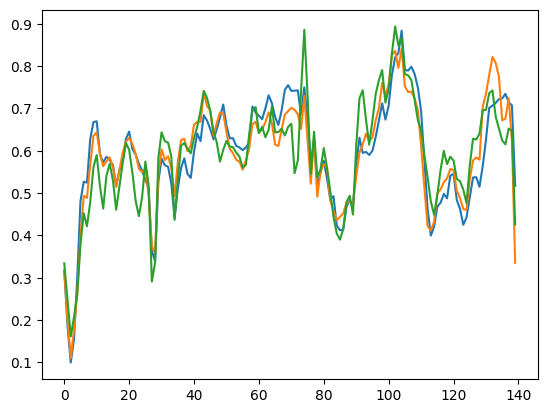

In [ ]:
plt.plot(normal_train[0])
plt.plot(normal_train[1])
plt.plot(normal_train[2])

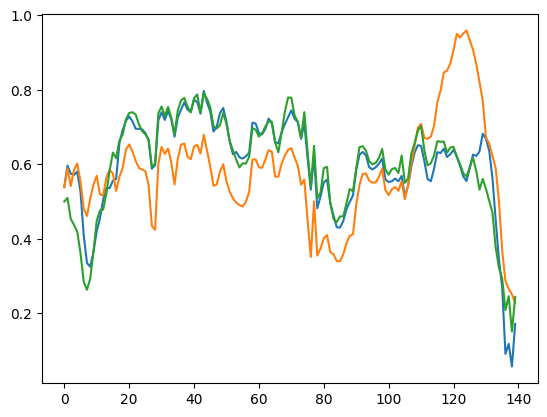

In [ ]:
plt.plot(annomaly_train[0])
plt.plot(annomaly_train[1])
plt.plot(annomaly_train[2])

##Autoencoder Model Architecture

In [ ]:
class AutoEncoder(Model) :
  def __init__(self) :
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu')])

    self.decoder = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(140,activation='sigmoid')])

  def call(self, x) :
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
model = AutoEncoder()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience=2,
                                                  mode = 'min')
model.compile(optimizer = 'adam', loss = 'mae')

In [ ]:
history = model.fit(normal_train, normal_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_train_scaled[:,1:], x_train_scaled[:,1:]),
                    shuffle=True,
                    callbacks=[early_stopping]
                    )

Epoch 1/50
19/19 [==============================] - 6s 35ms/step - loss: 0.1112 - val_loss: 0.0987
Epoch 2/50
19/19 [==============================] - 0s 27ms/step - loss: 0.0676 - val_loss: 0.0781
Epoch 3/50
19/19 [==============================] - 0s 11ms/step - loss: 0.0497 - val_loss: 0.0756
Epoch 4/50
19/19 [==============================] - 0s 12ms/step - loss: 0.0468 - val_loss: 0.0752
Epoch 5/50
19/19 [==============================] - 0s 27ms/step - loss: 0.0464 - val_loss: 0.0747
Epoch 6/50
19/19 [==============================] - 0s 15ms/step - loss: 0.0463 - val_loss: 0.0743
Epoch 7/50
19/19 [==============================] - 0s 17ms/step - loss: 0.0462 - val_loss: 0.0739
Epoch 8/50
19/19 [==============================] - 0s 19ms/step - loss: 0.0460 - val_loss: 0.0735
Epoch 9/50
19/19 [==============================] - 0s 17ms/step - loss: 0.0458 - val_loss: 0.0731
Epoch 10/50
19/19 [==============================] - 0s 16ms/step - loss: 0.0453 - val_loss: 0.0722
Epoch 11/

##Model Summary

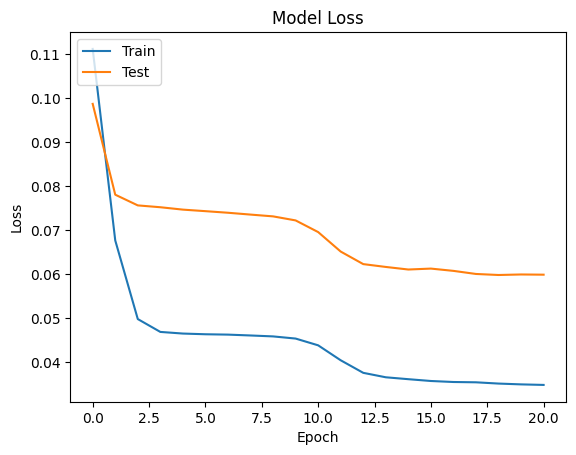

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [ ]:
model.summary()

Model: "auto_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 8)                 11768     
                                                                 
 sequential_1 (Sequential)   (None, 140)               11900     
                                                                 
Total params: 23668 (92.45 KB)
Trainable params: 23668 (92.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
encoder = model.encoder(normal_test).numpy()
decoder = model.decoder(encoder).numpy()

In [ ]:
encoder.shape

(586, 8)

In [ ]:
decoder.shape

(586, 140)

##Reconstruction of the values to Normal Scales

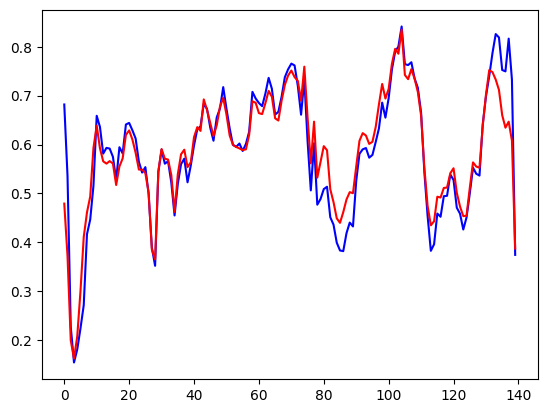

In [ ]:
plt.plot(normal_test[0],'b')
plt.plot(decoder[0],'r')

19/19 [==============================] - 1s 5ms/step


(array([ 9., 20., 40., 41., 43., 42., 40., 45., 41., 26., 30., 24., 25.,
        14., 23., 15., 12., 16., 10.,  3., 11.,  8.,  9.,  9.,  5.,  0.,
         3.,  4.,  1.,  3.,  2.,  4.,  0.,  0.,  1.,  1.,  0.,  3.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([0.01321961, 0.0153514 , 0.01748319, 0.01961499, 0.02174678,
        0.02387857, 0.02601036, 0.02814216, 0.03027395, 0.03240574,
        0.03453754, 0.03666933, 0.03880112, 0.04093291, 0.04306471,
        0.0451965 , 0.04732829, 0.04946009, 0.05159188, 0.05372367,
        0.05585546, 0.05798726, 0.06011905, 0.06225084, 0.06438264,
        0.06651443, 0.06864622, 0.07077802, 0.07290981, 0.0750416 ,
        0.07717339, 0.07930519, 0.08143698, 0.08356877, 0.08570057,
        0.08783236, 0.08996415, 0.09209594, 0.09422774, 0.09635953,
        0.09849132, 0.10062312, 0.10275491, 0.1048867 , 0.10701849,
        0.10915029, 0.11128208, 0.11341387, 0.11554567, 0.11767746,
        0.11980925]),
 <BarContainer

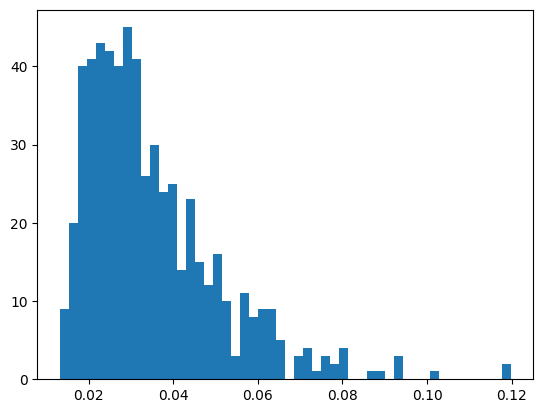

In [ ]:
reconstruction_normal = model.predict(normal_test)
train_loss_normal = tf.keras.losses.mae(reconstruction_normal, normal_test)

plt.hist(train_loss_normal, bins=50)

In [ ]:
np.mean(train_loss_normal)

0.03513829259753697

In [ ]:
np.std(train_loss_normal)

0.016010888659761992

In [ ]:
threshold = np.mean(train_loss_normal) + 2*np.std(train_loss_normal)
threshold

0.06716006991706096

13/13 [==============================] - 0s 6ms/step


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  2.,  7., 13., 24.,
        27., 35., 50., 41., 54., 38., 51., 22., 25.,  5.,  5.,  1.,  0.,
         2.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.04205182, 0.04514327, 0.04823472, 0.05132617, 0.05441763,
        0.05750908, 0.06060053, 0.06369199, 0.06678344, 0.06987489,
        0.07296634, 0.0760578 , 0.07914925, 0.0822407 , 0.08533216,
        0.08842361, 0.09151506, 0.09460651, 0.09769797, 0.10078942,
        0.10388087, 0.10697232, 0.11006378, 0.11315523, 0.11624668,
        0.11933814, 0.12242959, 0.12552104, 0.12861249, 0.13170395,
        0.1347954 , 0.13788685, 0.14097831, 0.14406976, 0.14716121,
        0.15025266, 0.15334412, 0.15643557, 0.15952702, 0.16261847,
        0.16570993, 0.16880138, 0.17189283, 0.17498429, 0.17807574,
        0.18116719, 0.18425864, 0.1873501 , 0.19044155, 0.193533  ,
        0.19662446]),
 <BarContainer

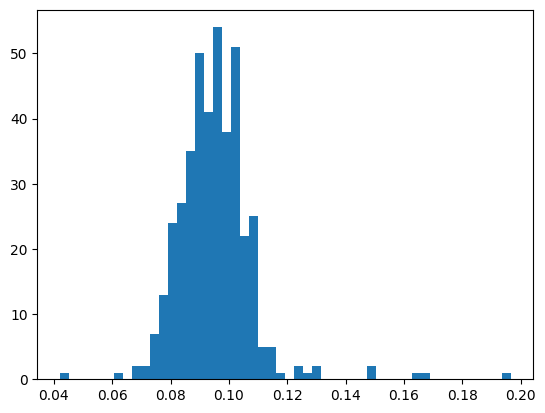

In [ ]:
reconstruction_annomaly = model.predict(annomaly_test)
train_loss_annomaly = tf.keras.losses.mae(reconstruction_annomaly, annomaly_test)

plt.hist(train_loss_annomaly, bins=50)

In [ ]:
import numpy as np
import tensorflow as tf
import plotly.graph_objects as go

def calculate_accuracy_and_plot(train_loss_annomaly, threshold, normal_test, annomaly_test):

    predictions = (train_loss_annomaly.numpy() > threshold).astype(int)
    accuracy = np.sum(predictions) / len(predictions) * 100


    fig = go.Figure()

    fig.add_trace(go.Scatter3d(
        x=normal_test[:, 0],
        y=normal_test[:, 1],
        z=train_loss_normal,
        mode='markers',
        name='Normal',
        marker=dict(
            size=5,
            color=train_loss_normal,
            colorscale='Viridis',
            opacity=0.8
        )
    ))

    fig.add_trace(go.Scatter3d(
        x=annomaly_test[:, 0],
        y=annomaly_test[:, 1],
        z=train_loss_annomaly.numpy(),
        mode='markers',
        name='Anomaly',
        marker=dict(
            size=5,
            color=train_loss_annomaly.numpy(),
            colorscale='Viridis',
            opacity=0.8
        )
    ))

    x_plane = np.linspace(np.min(normal_test[:, 0]), np.max(normal_test[:, 0]), 10)
    y_plane = np.linspace(np.min(normal_test[:, 1]), np.max(normal_test[:, 1]), 10)
    z_plane = np.full((10, 10), threshold)
    fig.add_surface(x=x_plane, y=y_plane, z=z_plane, showscale=False, opacity=0.5, name='Threshold')

    fig.update_layout(title="Accuracy: {:.2f}%".format(accuracy),
                      scene=dict(xaxis_title='Feature 1', yaxis_title='Feature 2', zaxis_title='Reconstruction Error'),
                      width=800, height=600)

    fig.show()

calculate_accuracy_and_plot(train_loss_annomaly, threshold, normal_test, annomaly_test)

In [ ]:
np.mean(train_loss_annomaly)

0.09518375895372139

In [ ]:
np.std(train_loss_annomaly)

0.013071930494935343

In [ ]:
tf.math.less(train_loss_normal, threshold)

<tf.Tensor: shape=(586,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  Tr

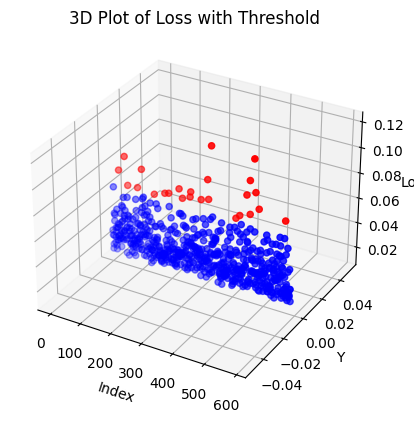

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.arange(len(train_loss_normal))
y = np.zeros_like(x)
z = train_loss_normal

colors = ['blue' if val else 'red' for val in tf.math.less(train_loss_normal, threshold)]

ax.scatter(x, y, z, c=colors)

ax.set_xlabel('Index')
ax.set_ylabel('Y')
ax.set_zlabel('Loss')
plt.title('3D Plot of Loss with Threshold')
plt.show()

<Axes: >

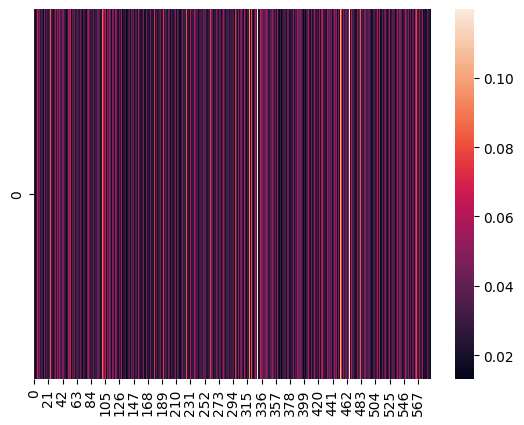

In [ ]:
import seaborn as sns
train_loss_normal_2d = tf.reshape(train_loss_normal, [1, -1])
sns.heatmap(train_loss_normal_2d)

In [ ]:
preds = tf.math.less(train_loss_normal, threshold)

In [ ]:
tf.math.count_nonzero(preds)

<tf.Tensor: shape=(), dtype=int64, numpy=561>

In [ ]:
preds.shape

TensorShape([586])

In [ ]:
preds_annnomaly = tf.math.greater(train_loss_annomaly, threshold)
tf.math.count_nonzero(preds_annnomaly)

<tf.Tensor: shape=(), dtype=int64, numpy=412>

In [ ]:
preds_annnomaly.shape

TensorShape([414])

##Representation of True Values and False Values

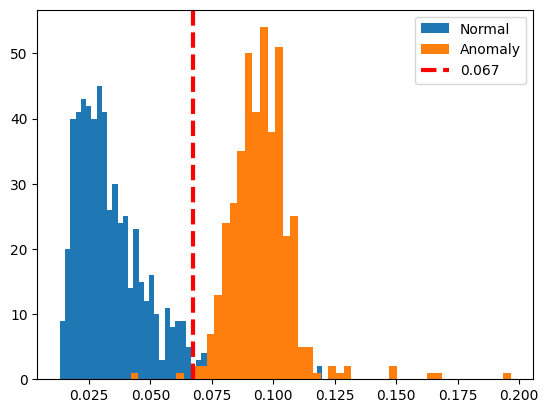

In [ ]:
plt.hist(train_loss_normal, bins=50, label='Normal')
plt.hist(train_loss_annomaly, bins=50, label='Anomaly')
plt.axvline(threshold, color='r',linewidth=3, linestyle='dashed', label='{:0.3f}'.format(threshold))
plt.legend(loc='upper right')
plt.show()

In [ ]:
def plot_3d_loss(train_loss_normal, train_loss_anomaly):

  x = np.arange(train_loss_normal.shape[0])

  fig_normal = go.Figure(data=[go.Scatter3d(
      x=x,
      y=np.zeros_like(x),
      z=train_loss_normal.numpy().flatten(),
      mode='markers',
      marker=dict(
          size=5,
          color='blue',
          colorscale='Viridis',
          opacity=0.8
      )
  )])

  fig_normal.update_layout(title='Reconstruction Loss for Normal Data',
                    scene=dict(
                        xaxis_title='Sample Index',
                        yaxis_title='Feature Index',
                        zaxis_title='Reconstruction Loss'),
                        width=600,
                        height=500)

  x = np.arange(train_loss_anomaly.shape[0])

  fig_anomaly = go.Figure(data=[go.Scatter3d(
      x=x,
      y=np.zeros_like(x),
      z=train_loss_anomaly.numpy().flatten(),
      mode='markers',
      marker=dict(
          size=5,
          color='red',
          colorscale='Viridis',
          opacity=0.8
      )
  )])

  fig_anomaly.update_layout(title='Reconstruction Loss for Anomaly Data',
                    scene=dict(
                        xaxis_title='Sample Index',
                        yaxis_title='Feature Index',
                        zaxis_title='Reconstruction Loss'),
                        width=600,
                        height=500)

  fig_normal.show()
  fig_anomaly.show()

plot_3d_loss(train_loss_normal, train_loss_annomaly)

In [ ]:
def plot_3d_loss_diff(train_loss_normal, train_loss_anomaly):

  min_length = min(train_loss_normal.shape[0], train_loss_anomaly.shape[0])
  difference = train_loss_anomaly[:min_length] - train_loss_normal[:min_length]

  x = np.arange(min_length)

  fig_diff = go.Figure(data=[go.Scatter3d(
      x=x,
      y=np.zeros_like(x),
      z=difference.numpy().flatten(),
      mode='markers',
      marker=dict(
          size=5,
          color=difference.numpy().flatten(),
          colorscale='Viridis',
          opacity=0.8
      )
  )])

  fig_diff.update_layout(title='Difference in Reconstruction Loss (Anomaly - Normal)',
                    scene=dict(
                        xaxis_title='Sample Index',
                        yaxis_title='Feature Index',
                        zaxis_title='Loss Difference'),
                        width=700,
                        height=600)

  fig_diff.show()

plot_3d_loss_diff(train_loss_normal, train_loss_annomaly)

In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
import pickle
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
model.save("model", save_format='tf')